## Домашнее задание
### Оптимизация работы с Olivetti

Цель:
Цель этого домашнего задания — попробовать использование разных классификаторов в качестве Feature Matching.

Описание/Пошаговая инструкция выполнения домашнего задания:
1) Взять код из занятия.
2) Добавить свою Сеть/Модель в конец.
3) Обучить свой классификатор на PCA датасете.

In [1]:
import numpy as np # Работа с алгеброй
import pandas as pd # Обработка данных

#Визуализация
import matplotlib.pyplot as plt

#ML
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics

#System
import os


<a class="anchor" id="2."></a>Olivetti Dataset

Описание:

* Все изображения взяты между 1992 и 1994 годами.
* 40 людей, 10 изображений каждого.
* Это результирует в 400 изображениях
* Изображения были сняты в разное время, с разным освещением и с разным поворотом головы
* На всех изображениях черный задник
* Изображения нормализованны по высоте
* Размер изображения 64x64
* Значения пикселей изображений нормированны в [0, 1] 
* Каждому человеку был присвоен номер от 0 до 39


In [18]:
target= np.load("olivetti_faces_target.npy")
data = np.load("olivetti_faces.npy")

In [27]:
print("В основном датасете {}".format(len(data)), "изображений")
print("В целевом датасете {}".format(len(np.unique(target))), "изображений")
print("Размер изображений {}x{}".format(data.shape[1], data.shape[2]))
print("Масштабирование в интервале [0,1]. Пример:{}".format(data[0][0,:4]))
print("Кол-во личностей: 40 человек -",np.unique(target))

В основном датасете 400 изображений
В целевом датасете 40 изображений
Размер изображений 64x64
Масштабирование в интервале [0,1]. Пример:[0.30991736 0.3677686  0.41735536 0.44214877]
Кол-во личностей: 40 человек - [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


In [28]:
def show_40_distinct_people(images, unique_ids):
    #Creating 4X10 subplots in  18x9 figure size
    fig, axarr=plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
    #For easy iteration flattened 4X10 subplots matrix to 40 array
    axarr=axarr.flatten()
    
    #iterating over user ids
    for unique_id in unique_ids:
        image_index=unique_id*10
        axarr[unique_id].imshow(images[image_index], cmap='gray')
        axarr[unique_id].set_xticks([])
        axarr[unique_id].set_yticks([])
        axarr[unique_id].set_title("face id:{}".format(unique_id))
    plt.suptitle("There are 40 distinct people in the dataset")

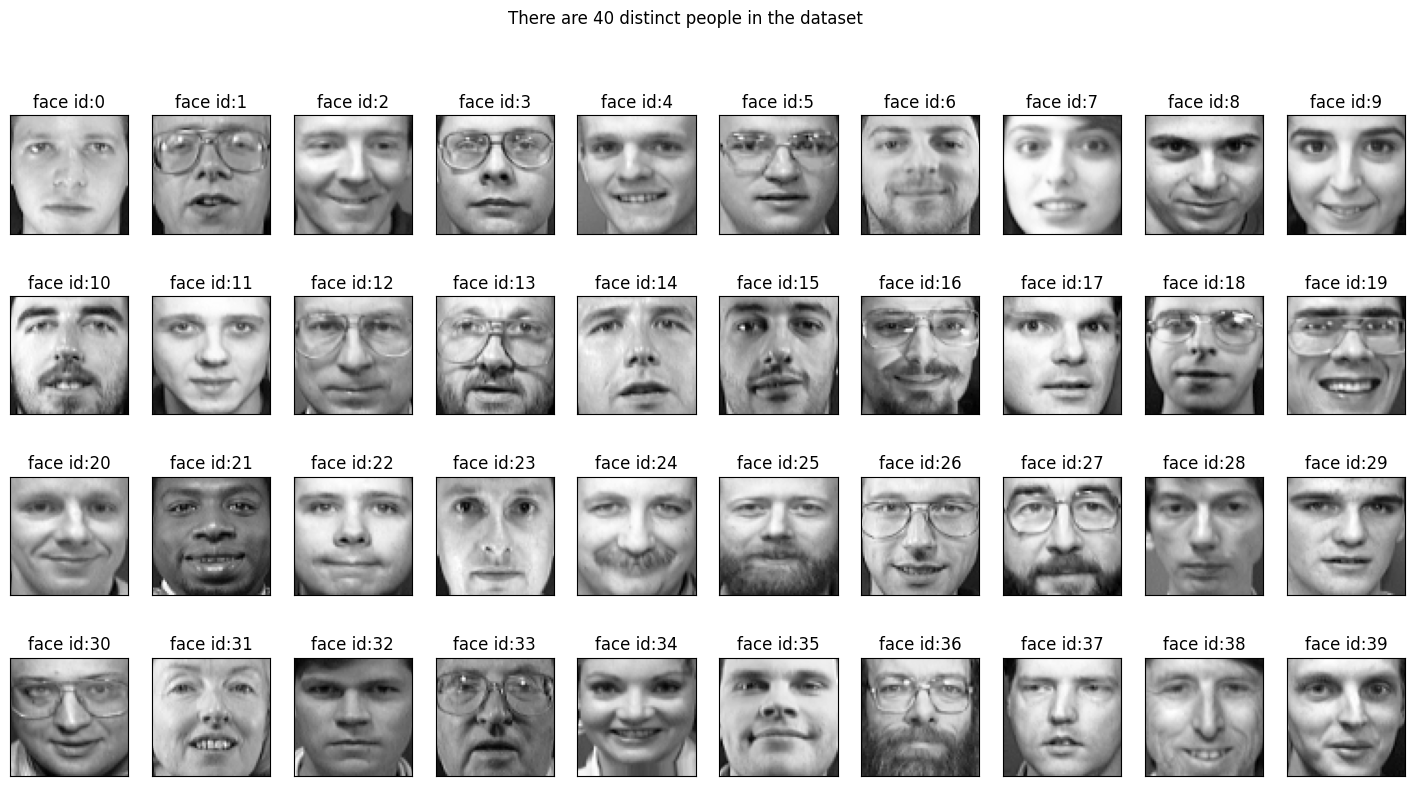

In [39]:
show_40_distinct_people(data, np.unique(target))

In [30]:
def show_10_faces_of_n_subject(images, subject_ids):
    cols=10# each subject has 10 distinct face images
    rows=(len(subject_ids)*10)/cols #
    rows=int(rows)
    
    fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(18,9))
    #axarr=axarr.flatten()
    
    for i, subject_id in enumerate(subject_ids):
        for j in range(cols):
            image_index=subject_id*10 + j
            axarr[i,j].imshow(images[image_index], cmap="gray")
            axarr[i,j].set_xticks([])
            axarr[i,j].set_yticks([])
            axarr[i,j].set_title("face id:{}".format(subject_id))
    

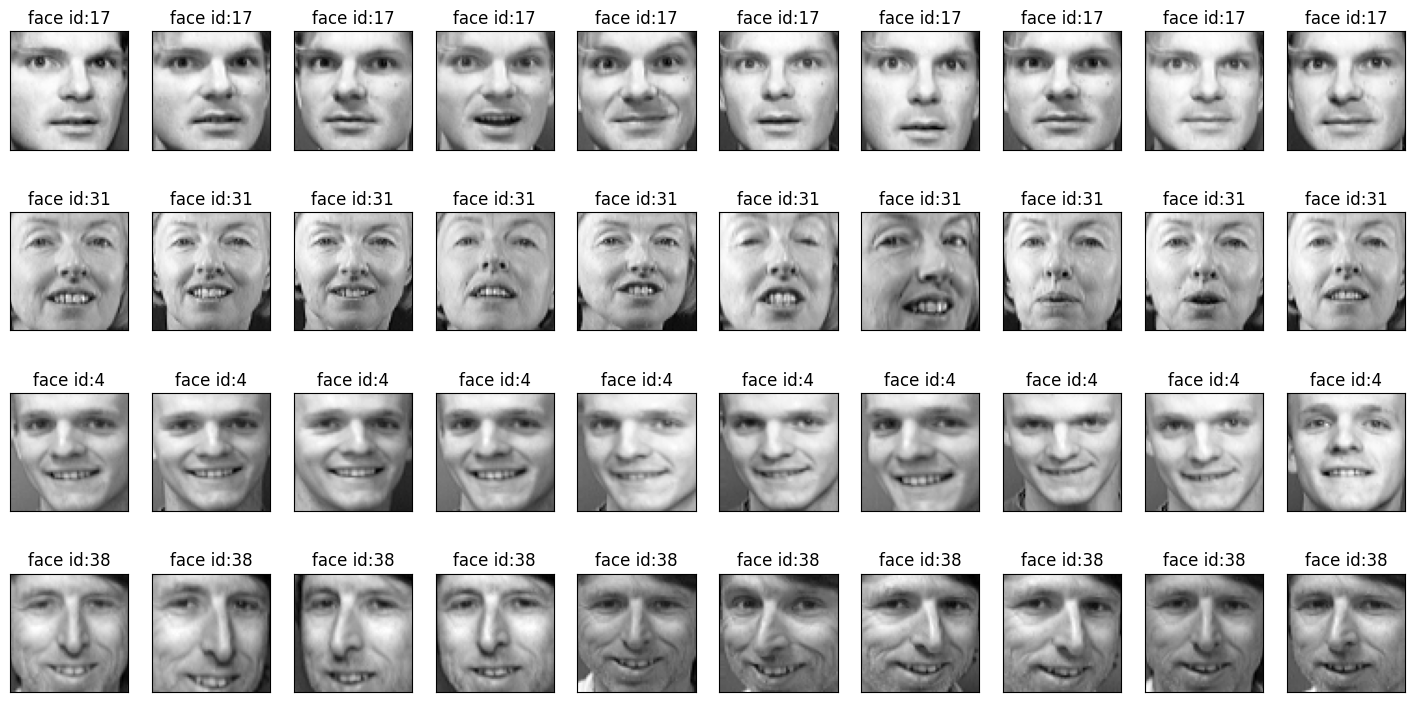

In [ ]:
show_10_faces_of_n_subject(images=data, subject_ids=[17, 31, 4, 38])

In [46]:
X=data.reshape((data.shape[0],data.shape[1]*data.shape[2]))
print("X shape:",X.shape)

X shape: (400, 4096)


In [64]:
X_train, X_test, y_train, y_test=train_test_split(X, target, test_size=0.2, stratify=target, random_state=0)
print("X_train размер:",X_train.shape)
print("X_test размер:",X_test.shape)
print("y_train размер:{}".format(y_train.shape))
print("y_test размер:{}".format(y_test.shape))

X_train размер: (320, 4096)
X_test размер: (80, 4096)
y_train размер:(320,)
y_test размер:(80,)


<Axes: title={'center': 'Кол-во изображений на личность'}, xlabel='subject ids'>

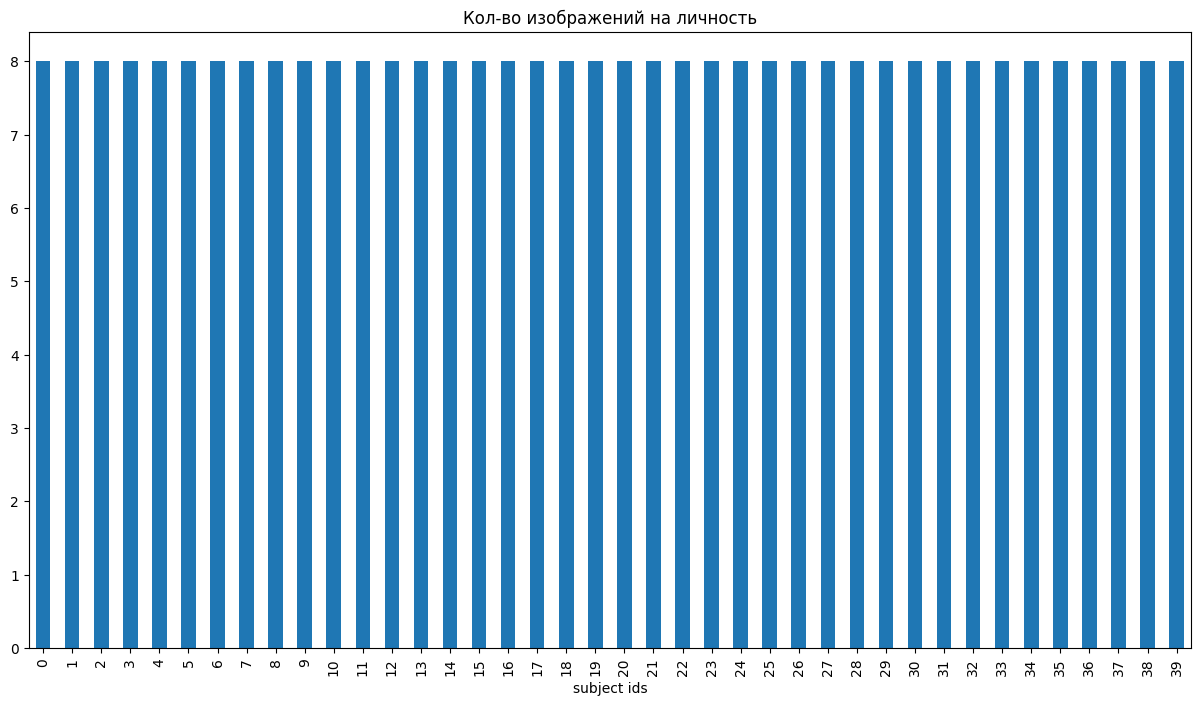

In [66]:
y_frame=pd.DataFrame()
y_frame['subject ids']=y_train
y_frame.groupby(['subject ids']).size().plot.bar(figsize=(15,8),title="Кол-во изображений на личность")

## Дока на PCA
__https://scikit-learn.org/1.6/modules/generated/sklearn.decomposition.PCA.html__

In [67]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(X)
X_pca=pca.transform(X)

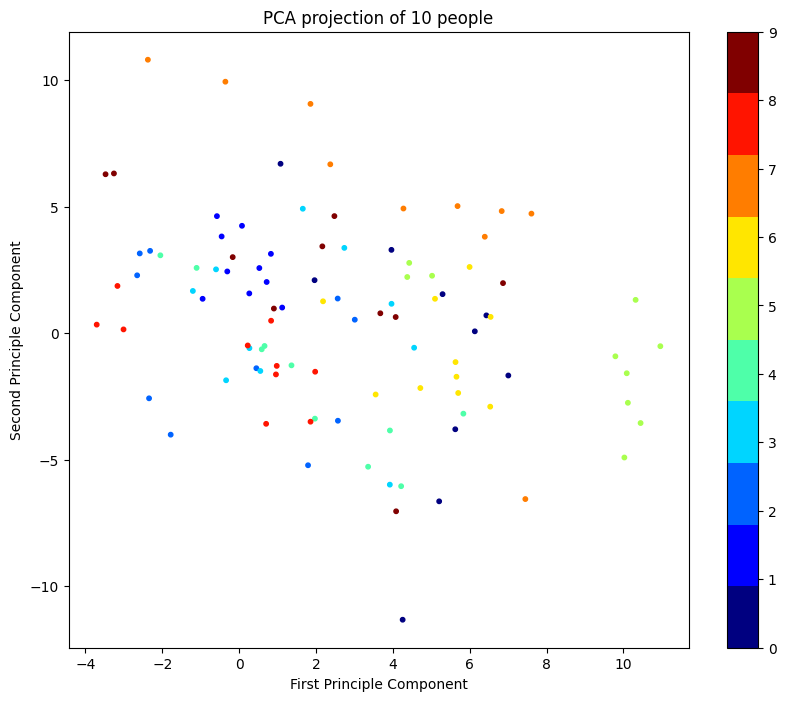

In [68]:
number_of_people=10
index_range=number_of_people*10
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(1,1,1)
scatter=ax.scatter(X_pca[:index_range,0],
            X_pca[:index_range,1], 
            c=target[:index_range],
            s=10,
           cmap=plt.get_cmap('jet', number_of_people)
          )

ax.set_xlabel("First Principle Component")
ax.set_ylabel("Second Principle Component")
ax.set_title("PCA projection of {} people".format(number_of_people))

fig.colorbar(scatter)

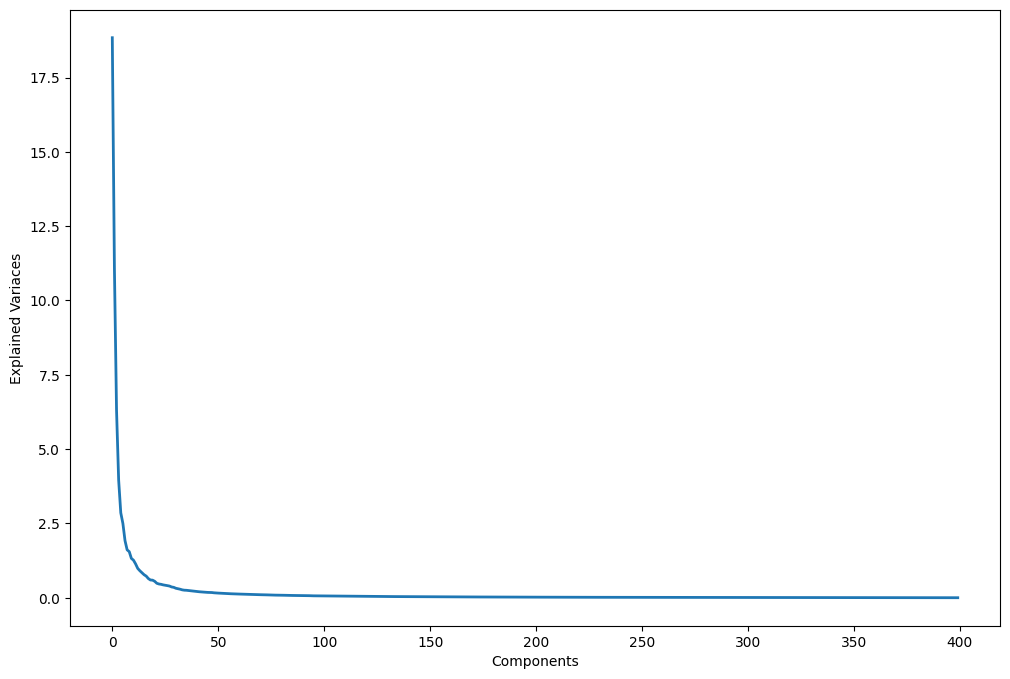

In [69]:
pca=PCA()
pca.fit(X)

plt.figure(1, figsize=(12,8))

plt.plot(pca.explained_variance_, linewidth=2)
 
plt.xlabel('Components')
plt.ylabel('Explained Variaces')
plt.show()

По графику сверху, мы можем увидеть что увеличение количества компонент выше 90 не дает нам значимого улучшения

In [71]:
n_components=120

In [72]:
pca=PCA(n_components=n_components, whiten=True)
pca.fit(X_train)

PCA(n_components=120, whiten=True)

Text(0.5, 1.0, 'Average Face')

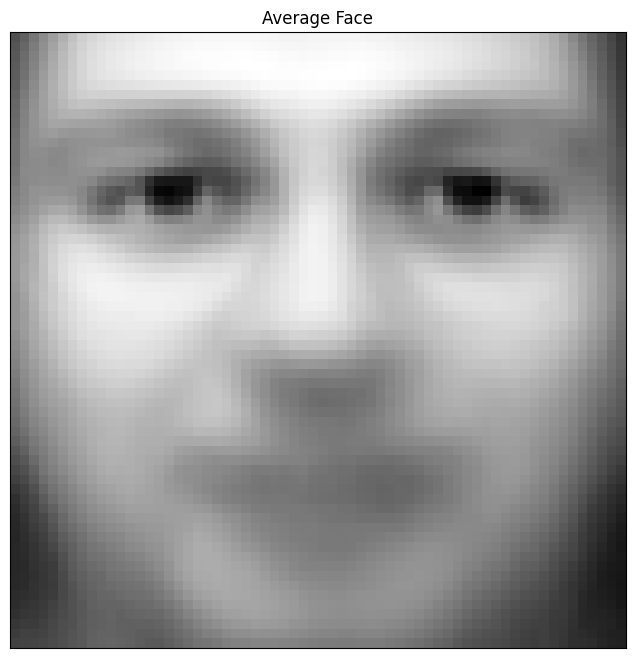

In [73]:
fig,ax=plt.subplots(1,1,figsize=(8,8))
ax.imshow(pca.mean_.reshape((64,64)), cmap="gray")
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Average Face')

Text(0.5, 0.98, 'All Eigen Faces')

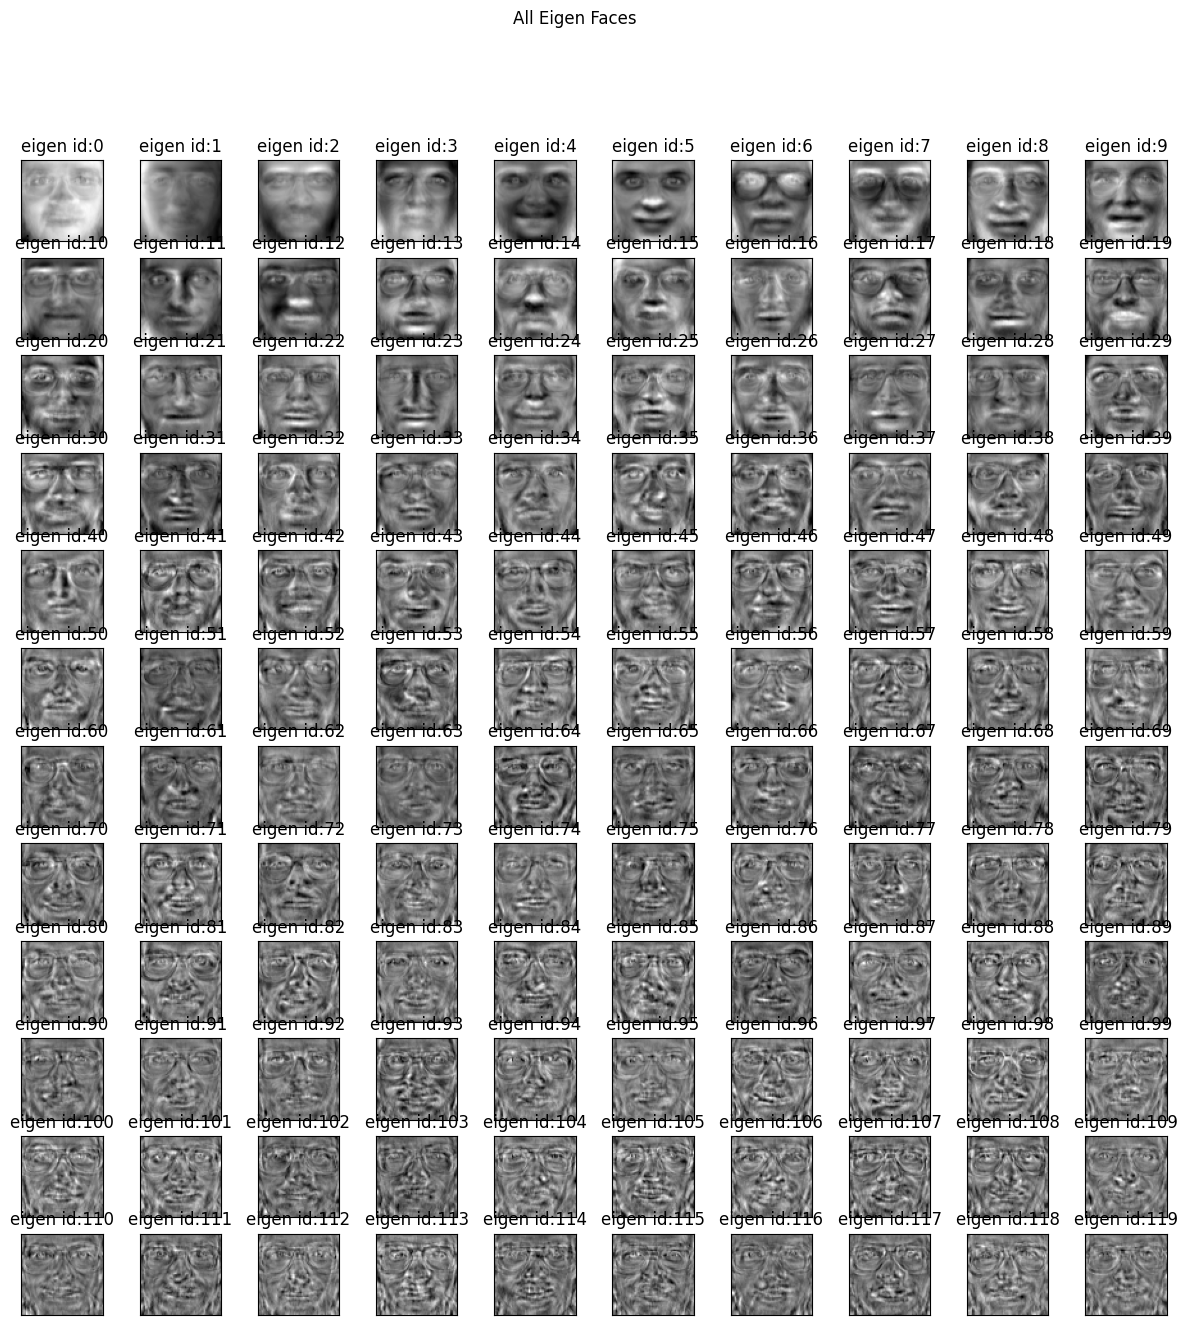

In [74]:
number_of_eigenfaces=len(pca.components_)
eigen_faces=pca.components_.reshape((number_of_eigenfaces, data.shape[1], data.shape[2]))

cols=10
rows=int(number_of_eigenfaces/cols)
fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))
axarr=axarr.flatten()
for i in range(number_of_eigenfaces):
    axarr[i].imshow(eigen_faces[i],cmap="gray")
    axarr[i].set_xticks([])
    axarr[i].set_yticks([])
    axarr[i].set_title("eigen id:{}".format(i))
plt.suptitle("All Eigen Faces".format(10*"=", 10*"="))

In [75]:
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)

In [76]:
clf = SVC()
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)
print("accuracy score:{:.2f}".format(metrics.accuracy_score(y_test, y_pred)))

accuracy score:0.95


Сначала попробуем взять классификаторы из классического ML, такие как логиситическая регрессия, К-ближайших соседей и Случайный лес

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [78]:
log_reg = LogisticRegression()
knn = KNeighborsClassifier()
r_forrest = RandomForestClassifier()

In [79]:
r_forrest_params = {'n_estimators':range(10,200,10),
                    'max_depth':range(1,14,2),
                    'min_samples_leaf':range(1,8),
                    'min_samples_split':range(2,10,2)
                    }

In [80]:
log_reg_params = {'max_iter':range(50,501,50)}

In [81]:
knn_params = {'algorithm':['ball_tree','kd_tree','brute'],
              'leaf_size': range(2,91,30),
             }

In [82]:
grid_knn = GridSearchCV(knn,knn_params,cv=5)
grid_log_reg = GridSearchCV(log_reg,log_reg_params,cv=5)
grid_forest = GridSearchCV(r_forrest,r_forrest_params,cv=5)

In [83]:
grid_knn = GridSearchCV(knn,knn_params,cv=5)


In [84]:
grid_knn.fit(X_train_pca, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': range(2, 91, 30)})

In [85]:
grid_log_reg.fit(X_train_pca, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'max_iter': range(50, 501, 50)})

In [86]:
grid_forest.fit(X_train_pca, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(1, 14, 2),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': range(10, 200, 10)})

In [87]:
y_pred_rf = grid_forest.best_estimator_.predict(X_test_pca)
print("accuracy score:{:.2f}".format(metrics.accuracy_score(y_test, y_pred_rf)))

accuracy score:0.94


In [88]:
y_pred_lr = grid_log_reg.best_estimator_.predict(X_test_pca)
print("accuracy score:{:.2f}".format(metrics.accuracy_score(y_test, y_pred_lr)))

accuracy score:0.94


In [135]:
y_pred = grid_knn.best_estimator_.predict(X_test_pca)
print("accuracy score:{:.2f}".format(metrics.accuracy_score(y_test, y_pred)))

accuracy score:0.69


Как видим, лучшая точность у логистической регрессии, попробуем написать простую нейронную сеть.

In [91]:
import tensorflow as tf # а говорили pytorch доминирует

In [92]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(512,input_shape=(120,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(.5),
    tf.keras.layers.Dense(512, activation='elu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(.5),
    tf.keras.layers.Dense(256, activation='tanh'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(.5),
    tf.keras.layers.Dense(128, activation='elu'),
    tf.keras.layers.Dense(40, activation = 'softmax')
])

c:\Users\khari\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [93]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [94]:
model.fit(X_train_pca, y_train,epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0262 - loss: 4.8382    
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0863 - loss: 3.7180 
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2461 - loss: 2.9669 
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3777 - loss: 2.3951 
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5739 - loss: 1.7295 
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5915 - loss: 1.4976 
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6871 - loss: 1.2682 
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7430 - loss: 0.9670 
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8546 - loss: 0.7088 
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8691 - loss: 0.6467 
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9057 - loss: 0.5178 
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/st

In [95]:
model.evaluate(X_test_pca,y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9555 - loss: 0.1323  


[0.14975537359714508, 0.949999988079071]

Точность с нейронной сетью составила 94.9.. процентов, наивысшее значение, которое удалось получить

# Добавление своей модели

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score

## 0. Преобразование данных для pytorch

In [ ]:
X_train_tensor = torch.tensor(X_train_pca, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test_pca, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

## 2. Определение модели (конструктор pytorch)

In [ ]:
model = nn.Sequential(
    nn.Linear(120, 512),
    nn.BatchNorm1d(512),
    nn.Dropout(0.5),
    nn.ELU(),

    nn.Linear(512, 512),
    nn.BatchNorm1d(512),
    nn.Dropout(0.5),
    nn.ELU(),

    nn.Linear(512, 256),
    nn.BatchNorm1d(256),
    nn.Dropout(0.5),
    nn.Tanh(),

    nn.Linear(256, 128),
    nn.BatchNorm1d(128),
    nn.Dropout(0.5),
    nn.ELU(),

    nn.Linear(128, 40)
)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 3. Обучение модели

In [130]:
num_epochs = 100
train_losses = []
test_accuracies = []

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    
    # Логи
    train_losses.append(loss.item())

    # Оценка на тесте
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test_tensor)
        _, predicted = torch.max(test_outputs, 1)
        acc = accuracy_score(y_test_tensor.numpy(), predicted.numpy())
        test_accuracies.append(acc)

    if (epoch + 1) % 10 == 0:
        print(f"Эпоха [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Acc: {acc:.4f}")


Эпоха [10/100], Loss: 0.1783, Acc: 0.9375
Эпоха [20/100], Loss: 0.1517, Acc: 0.9375
Эпоха [30/100], Loss: 0.1162, Acc: 0.9375
Эпоха [40/100], Loss: 0.1034, Acc: 0.9375
Эпоха [50/100], Loss: 0.0968, Acc: 0.9375
Эпоха [60/100], Loss: 0.0700, Acc: 0.9375
Эпоха [70/100], Loss: 0.0775, Acc: 0.9375
Эпоха [80/100], Loss: 0.0636, Acc: 0.9375
Эпоха [90/100], Loss: 0.0577, Acc: 0.9375
Эпоха [100/100], Loss: 0.0497, Acc: 0.9375


## Финальная оценка для размерности __120__

In [131]:
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    _, predicted = torch.max(test_outputs, 1)
    final_accuracy = accuracy_score(y_test_tensor.numpy(), predicted.numpy())
    print(f"Accuracy: {final_accuracy:.4f}")

Accuracy: 0.9375


C:\Users\khari\AppData\Local\Temp\ipykernel_19140\2724541039.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  seaborn.barplot(x="Точность (%)", y="Модель", data=data, palette="viridis")


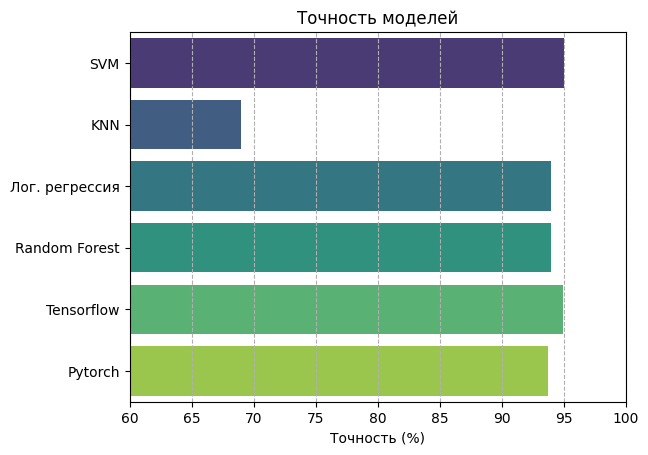

In [137]:
import seaborn
# Пример данных (вручную)
data = {
    "Модель": ["SVM", "KNN", "Лог. регрессия", "Random Forest", "Tensorflow", "Pytorch"],
    "Точность (%)": [95, 69, 94, 94, 94.99, 93.75],
}

seaborn.barplot(x="Точность (%)", y="Модель", data=data, palette="viridis")
plt.title("Точность моделей")
plt.xlabel("Точность (%)")
plt.ylabel("")
plt.xlim(60, 100)
plt.grid(axis="x", linestyle="--")
plt.show()